# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

base_url = "https://paper-api.alpaca.markets"
BTC = "BTCUSD"
ETH = "ETHUSD"

start_date = "2020-01-01"
end_date = "2022-11-01"

timeframe = "1Day"

In [4]:
# Crypto API URLs
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key)


In [5]:
# Fetch current BTC price
BTC_data= api.get_crypto_bars(BTC,timeframe,start_date,end_date).df
BTC_data= BTC_data[BTC_data['exchange']=='CBSE']
BTC_data_close = BTC_data.filter(['close'])

# Fetch current ETH price
ETH_data = api.get_crypto_bars(ETH,timeframe,start_date,end_date).df 
ETH_data= ETH_data[ETH_data['exchange']=='CBSE']
ETH_data_close = ETH_data.filter(['close'])

# Compute current value of my crpto
my_current_btc = BTC_data_close['close'].iloc[-1]
my_btc_value = my_current_btc * my_btc

my_current_eth = ETH_data_close['close'].iloc[-1]
my_eth_value = my_current_eth * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24609.50
The current value of your 5.3 ETH is $8430.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-01-01",tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-11-01",tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_stock = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
df_stock

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock[df_stock['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock[df_stock['symbol']=='SPY'].drop('symbol', axis=1)



# Concatenate the ticker DataFrames
stock_df = pd.concat([AGG,SPY],axis=1,keys=["AGG","SPY"])

# Preview DataFrame
stock_df.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2020-01-02 05:00:00+00:00  112.68  112.80  112.5600  112.68  6791537   
2020-01-03 05:00:00+00:00  112.89  113.05  112.7814  113.01  3664283   
2020-01-06 05:00:00+00:00  113.13  113.13  112.8400  112.92  8131608   
2020-01-07 05:00:00+00:00  112.92  112.92  112.7800  112.80  2883005   
2020-01-08 05:00:00+00:00  112.85  112.94  112.5450  112.67  7323117   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2020-01-02 05:00:00+00:00       17763  112.645004  323.54  324.89  322.53   
2020-01-03 05:00:00+00:00       14453  112.958798  321.16  323.64  321.10   
2020-01-06 05:00:00+00:00       17277  112.949600  320.49  323.73  320.36   
2020-01-07 05:00:00+00:00       11523  112.834953  323.02  323.54  322.24   
2020-01-08 05:00:00+00:00       12854  112.671650  322.94  325.78  322.67   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-01-02 05:00:00+00:00  324.87  59253833      304884  323.710023  
2020-01-03 05:00:00+00:00  322.43  77783121      358500  322.791701  
2020-01-06 05:00:00+00:00  323.73  55817168      255767  322.722391  
2020-01-07 05:00:00+00:00  322.74  42874811      226059  322.711069  
2020-01-08 05:00:00+00:00  324.42  68435753      340004  324.331733

In [9]:
# Pick AGG and SPY close prices
spy_close_price = stock_df['SPY']['close'].iloc[-1]
agg_close_price = stock_df['AGG']['close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.86
Current SPY closing price: $384.52


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price* my_agg
my_spy_value = spy_close_price * my_spy


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19226.00
The current value of your 200 AGG shares is $18972.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 10000

# Consolidate financial assets data
saving = [my_btc_value + my_eth_value, my_spy_value+my_agg_value]

# Create savings DataFrame
savings_df = pd.DataFrame(saving,columns=['Amount'], index =['Crypto','Stocks'])

# Display savings DataFrame
display(savings_df)

,Amount
Crypto,33039.843
Stocks,38198.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

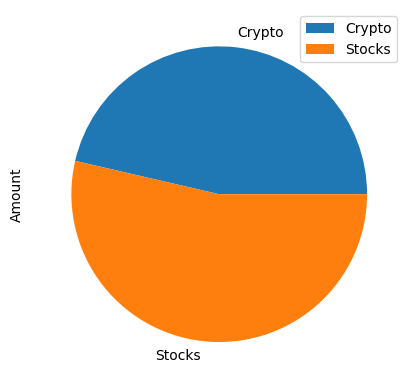

In [12]:
# Plot savings pie chart
savings_df.plot.pie(subplots = True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
Total_saving = float(savings_df.sum())

# Validate saving health
if Total_saving > emergency_fund:
    print("good_job")
elif Total_saving==emergency_fund:
        print("need_to_save_more")
else: 
    print("need_more_work")
    

good_job


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-11-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-11-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_5y = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_5y[df_stock_5y['symbol']=="SPY"].drop('symbol',axis=1)
AGG = df_stock_5y[df_stock_5y['symbol']== "AGG"].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY,AGG],axis =1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-11-01 04:00:00+00:00  258.04  258.43  257.07  257.50  54263336   
2017-11-02 04:00:00+00:00  257.41  257.75  256.19  257.62  56449535   
2017-11-03 04:00:00+00:00  257.77  258.50  257.30  258.45  62908639   
2017-11-06 05:00:00+00:00  258.30  259.00  258.22  258.81  54815449   
2017-11-07 05:00:00+00:00  258.97  259.35  258.09  258.70  57515699   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2017-11-01 04:00:00+00:00      193085  257.717880  109.17  109.410  109.170   
2017-11-02 04:00:00+00:00      217328  257.251675  109.35  109.495  109.331   
2017-11-03 04:00:00+00:00      189765  258.119308  109.48  109.480  109.290   
2017-11-06 05:00:00+00:00      130424  258.660092  109.56  109.590  109.460   
2017-11-07 05:00:00+00:00      170176  258.664821  109.58  109.610  109.490   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-11-01 04:00:00+00:00  109.29  2959362       11591  109.302138  
2017-11-02 04:00:00+00:00  109.35  2160492        8877  109.381316  
2017-11-03 04:00:00+00:00  109.45  1781239        9453  109.415086  
2017-11-06 05:00:00+00:00  109.55  1294303        7166  109.532241  
2017-11-07 05:00:00+00:00  109.58  2015511       10081  109.561412

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_df_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 100,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_df_stock_data.portfolio_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-11-01 04:00:00+00:00  258.04  258.43  257.07  257.50  54263336   
2017-11-02 04:00:00+00:00  257.41  257.75  256.19  257.62  56449535   
2017-11-03 04:00:00+00:00  257.77  258.50  257.30  258.45  62908639   
2017-11-06 05:00:00+00:00  258.30  259.00  258.22  258.81  54815449   
2017-11-07 05:00:00+00:00  258.97  259.35  258.09  258.70  57515699   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-01 04:00:00+00:00      193085  257.717880          NaN  109.17   
2017-11-02 04:00:00+00:00      217328  257.251675     0.000466  109.35   
2017-11-03 04:00:00+00:00      189765  258.119308     0.003222  109.48   
2017-11-06 05:00:00+00:00      130424  258.660092     0.001393  109.56   
2017-11-07 05:00:00+00:00      170176  258.664821    -0.000425  109.58   

                                                                          \
                              high      low   close   volume trade_count   
timestamp                                                                  
2017-11-01 04:00:00+00:00  109.410  109.170  109.29  2959362       11591   
2017-11-02 04:00:00+00:00  109.495  109.331  109.35  2160492        8877   
2017-11-03 04:00:00+00:00  109.480  109.290  109.45  1781239        9453   
2017-11-06 05:00:00+00:00  109.590  109.460  109.55  1294303        7166   
2017-11-07 05:00:00+00:00  109.610  109.490  109.58  2015511       10081   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-11-01 04:00:00+00:00  109.302138          NaN  
2017-11-02 04:00:00+00:00  109.381316     0.000549  
2017-11-03 04:00:00+00:00  109.415086     0.000914  
2017-11-06 05:00:00+00:00  109.532241     0.000914  
2017-11-07 05:00:00+00:00  109.561412     0.000274

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_df_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993042,1.000228,0.985399,1.001524,0.995290,0.994052,1.013744,1.011989,0.997432,1.000898,...,1.001948,0.999649,1.002855,1.008000,1.005811,0.998966,0.999380,1.007464,1.003804,0.992688
2,0.990282,0.998909,0.983576,1.007833,0.994798,0.988535,1.005401,1.009279,0.990457,0.994070,...,1.002573,0.998349,1.006107,1.014836,1.011381,1.011772,0.985883,1.012331,0.991510,0.990557
3,1.005352,0.994436,0.986868,1.014741,1.005587,0.974079,0.997109,1.011024,0.990277,0.991070,...,1.005698,0.990275,1.006906,1.032251,1.014956,1.006654,0.994584,1.010069,0.985565,0.992033
4,1.014020,0.989489,0.985444,1.018811,1.007751,0.987344,1.003688,1.006273,0.982734,0.993828,...,1.002434,0.979021,1.012807,1.030578,1.007344,1.005256,0.991892,1.016252,0.989279,0.990373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.524608,4.693629,2.227508,2.580320,2.746095,2.271580,2.213185,7.527528,2.428667,1.655583,...,5.127960,2.750113,6.997121,3.728975,1.805202,1.588516,5.940466,3.167103,1.981133,8.905380
7557,8.494509,4.705634,2.224938,2.562207,2.740589,2.279982,2.172855,7.521866,2.432678,1.653457,...,5.150361,2.726595,6.974364,3.757207,1.805523,1.610371,5.970321,3.187945,1.973030,8.788405
7558,8.482226,4.694737,2.216428,2.550611,2.788402,2.266657,2.176124,7.411072,2.422603,1.654939,...,5.125741,2.686694,6.949948,3.763351,1.797296,1.620881,5.999389,3.194913,1.998015,8.793758
7559,8.479111,4.655150,2.215678,2.550712,2.768800,2.257873,2.204633,7.390589,2.422134,1.665445,...,5.137118,2.687364,6.955484,3.768507,1.797170,1.611936,5.991292,3.216343,1.976419,8.762273


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

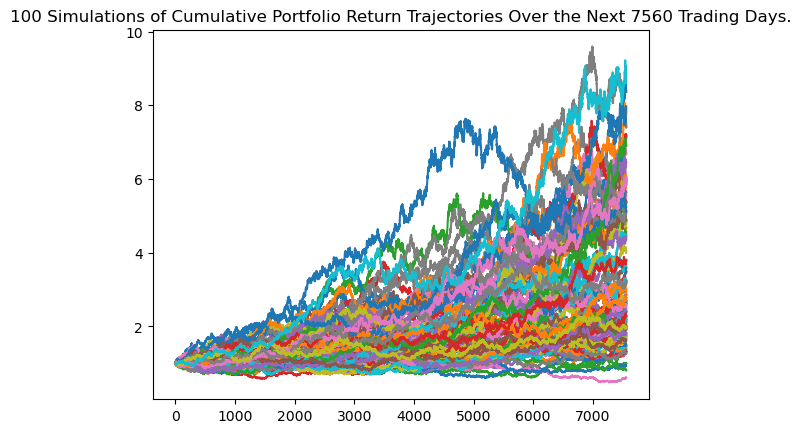

In [19]:
# Plot simulation outcomes
MC_df_stock_data.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

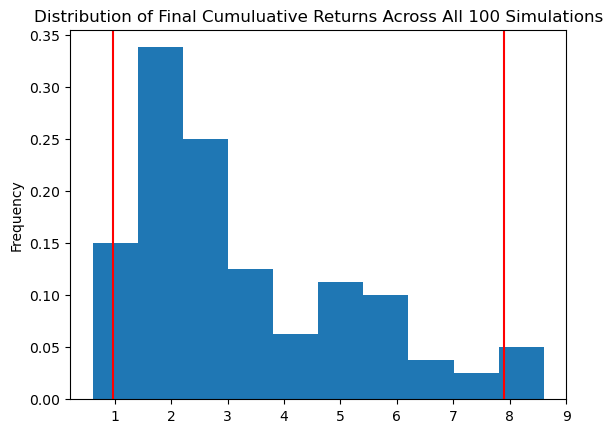

In [20]:
# Plot probability distribution and confidence intervals
MC_df_stock_data.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_df_stock_data.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           100.000000
mean              3.294137
std               1.944617
min               0.612679
25%               1.888440
50%               2.618685
75%               4.695026
max               8.602005
95% CI Lower      0.965418
95% CI Upper      7.904441
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*20000,2)
ci_upper = round(summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19308.36 and $158088.81


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(summary[9]*30000,2)
ci_lower = round(summary[8]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28962.55 and $237133.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_df_5y_stock = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 100,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_df_5y_stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004816,1.002145,0.991093,0.993080,1.011422,0.999588,1.001990,0.997592,0.994966,0.996718,...,1.003242,1.015967,1.004182,1.005504,0.995336,1.000560,1.002330,0.998742,0.995961,0.999019
2,0.991712,1.005325,0.989897,0.991249,1.014819,1.012905,1.008623,1.003350,0.996431,1.000054,...,0.997232,1.021685,1.003631,1.004235,0.999367,1.006833,1.000889,1.016433,0.996860,0.994973
3,0.987344,1.009653,0.987803,0.993215,1.017103,1.029293,1.008427,1.005623,1.001466,1.007985,...,1.002095,1.029143,1.005259,1.004849,1.003025,0.996429,0.992066,1.024345,1.004110,0.988802
4,0.989193,1.011486,0.990307,0.993907,1.015466,1.018911,0.993822,1.004055,1.008051,1.011814,...,0.992090,1.029204,1.013107,1.002826,1.000464,1.003702,0.992359,1.027989,1.005902,0.993162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.132278,0.646392,1.274343,1.109943,1.286058,1.454532,1.213773,0.890896,1.391024,0.644433,...,0.785040,1.187492,1.077764,1.186436,0.899834,1.137854,1.177625,1.379013,1.303240,0.936292
1257,1.119999,0.653350,1.281402,1.118107,1.282684,1.473563,1.227779,0.894917,1.375615,0.651281,...,0.787677,1.170576,1.079623,1.192629,0.895878,1.147791,1.170047,1.388231,1.301560,0.931837
1258,1.117162,0.657019,1.284917,1.121099,1.301192,1.459630,1.217116,0.892779,1.371752,0.646509,...,0.781085,1.170656,1.090374,1.201674,0.901073,1.138621,1.167333,1.384178,1.286378,0.931348
1259,1.123117,0.655132,1.302051,1.139474,1.295001,1.461949,1.206937,0.892466,1.382212,0.641450,...,0.782386,1.161205,1.085850,1.201003,0.907693,1.136727,1.162913,1.401769,1.290213,0.937665


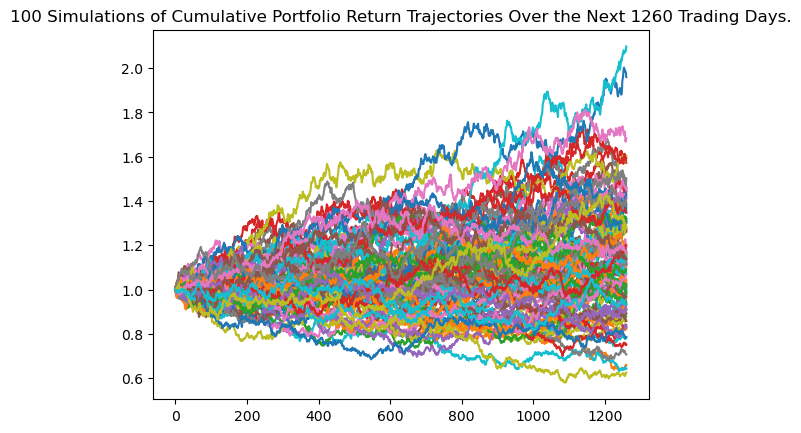

In [26]:
# Plot simulation outcomes
sim = MC_df_5y_stock.plot_simulation()

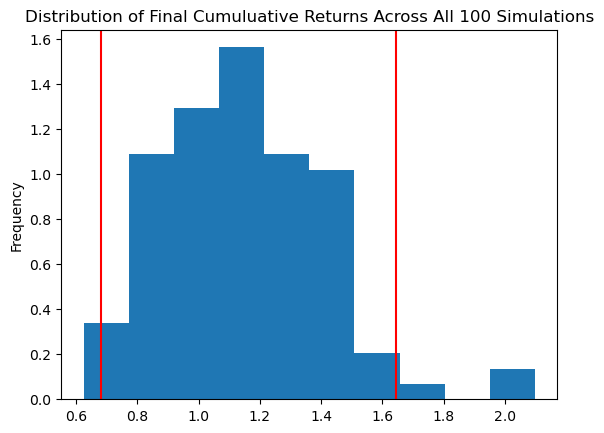

In [27]:
# Plot probability distribution and confidence intervals
distr = MC_df_5y_stock.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
data = MC_df_5y_stock.summarize_cumulative_return()

# Print summary statistics
print(data)

count           100.000000
mean              1.147622
std               0.268066
min               0.625612
25%               0.948405
50%               1.130567
75%               1.318715
max               2.097541
95% CI Lower      0.681812
95% CI Upper      1.644267
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 5000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_five = round(data[9]*5000,2)
ci_lower_five = round(data[8]*5000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $5000 in the portfolio over the next 5 years will end within in the range of $3409.06 and $8221.33


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 100,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993799,1.001403,0.999114,1.008134,1.009428,0.998788,0.996783,1.005972,1.001582,0.993880,...,0.994613,1.000058,0.997662,1.013617,1.000735,0.999849,1.008052,0.995910,0.997054,1.002165
2,0.994771,0.992398,0.988210,1.004346,0.991308,1.004752,0.994294,1.001843,1.006444,0.992268,...,1.002048,0.996470,1.000913,1.022490,1.000101,1.009925,1.011483,1.006754,1.001242,0.994706
3,1.000118,0.993294,0.981875,1.004653,1.005646,0.999707,0.986573,1.000439,1.000026,0.991229,...,1.012185,1.004069,0.993624,1.017958,0.997021,1.005425,1.020692,1.004401,0.996948,0.999487
4,0.988572,0.994156,0.988834,0.984773,1.012093,0.996367,0.987197,1.002992,1.001004,1.000982,...,1.029648,0.990648,0.997684,1.026960,1.002363,0.998888,1.020938,1.002150,0.991842,0.998461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.101855,1.892496,1.202501,1.302660,0.862052,1.614970,1.548715,1.531465,1.001403,1.050830,...,1.964648,1.988455,1.208301,1.009776,1.439974,1.183402,1.358258,1.253292,1.283797,1.596044
2517,1.095165,1.878871,1.196189,1.300003,0.867485,1.614637,1.547905,1.530205,0.999463,1.052045,...,1.961592,1.994963,1.203649,1.013680,1.450600,1.189701,1.384006,1.252855,1.276826,1.610889
2518,1.105044,1.862072,1.203907,1.300534,0.865795,1.602328,1.549863,1.525205,1.000739,1.056167,...,1.974560,1.979995,1.214658,1.024186,1.452712,1.192094,1.387673,1.259725,1.267357,1.611220
2519,1.099950,1.862214,1.209670,1.296014,0.866526,1.601616,1.550726,1.522932,0.998292,1.054021,...,1.996315,1.962674,1.226788,1.031810,1.450003,1.209043,1.401962,1.258765,1.270960,1.608555


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

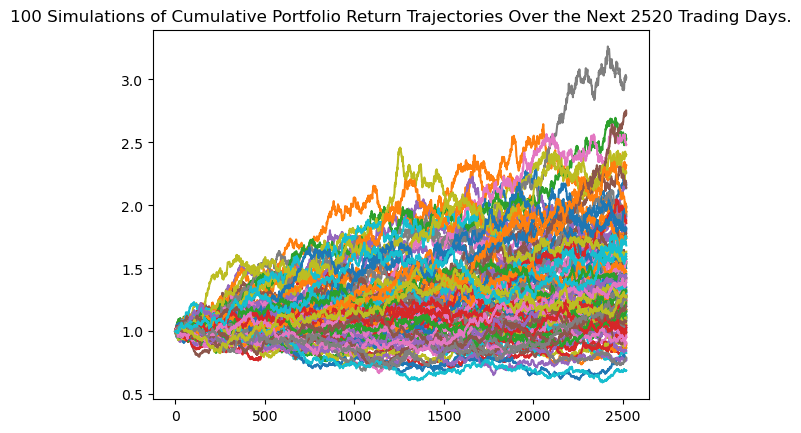

In [32]:
# Plot simulation outcomes
MC_retirement.plot_simulation()

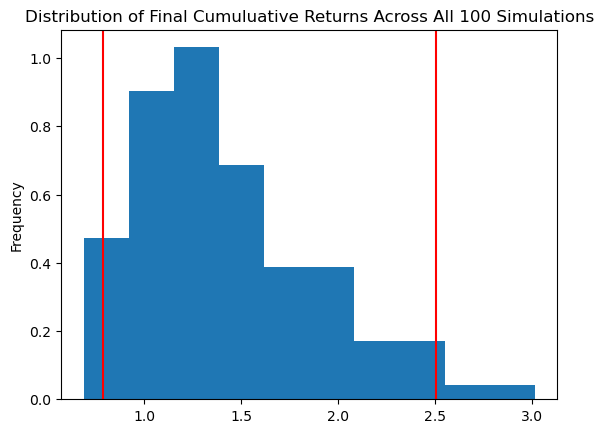

In [33]:
# Plot probability distribution and confidence intervals
retirement_distr = MC_retirement.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement = MC_retirement.summarize_cumulative_return()

# Print summary statistics
print(retirement)

count           100.000000
mean              1.427203
std               0.468499
min               0.689530
25%               1.089579
50%               1.298207
75%               1.741296
max               3.015860
95% CI Lower      0.785798
95% CI Upper      2.506476
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investmet = 1000000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_ten = round(retirement[9]*100000,2)
ci_lower_ten = round(retirement[8]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $5000 in the portfolio over the next 10 years will end within in the range of $78579.79 and $250647.6
